In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_filename = r"D:\Lisa\nnUNet_raw_data_base\nnUNet_raw_data\Task001_CA\imagesTs1\AMC006_0000.nii.gz"
nnunet_filename = r"D:\Lisa\nnUNet_raw_data_base\nnUNet_results\Ts1\AMC006.nii.gz"
gt_filename = r"D:\Lisa\nnUNet_raw_data_base\nnUNet_raw_data\Task001_CA\labelsTs1\AMC006.nii.gz"
plaqunet_filename = r"C:\Users\E.Lavrova\Documents\GitHub\plaqueuqalp\res\nifti_compare\test_plaqumap\AMC006.nii.gz"

In [3]:
img_nii = nib.load(img_filename)
nnunet_nii = nib.load(nnunet_filename)
gt_nii = nib.load(gt_filename)
plaqunet_nii = nib.load(plaqunet_filename)

In [4]:
img = np.rot90(img_nii.get_fdata().T, k=2)
nnunet = np.rot90(nnunet_nii.get_fdata().T, k=2)
gt = np.rot90(gt_nii.get_fdata().T, k=2)
plaqunet = np.rot90(plaqunet_nii.get_fdata().T, k=2)

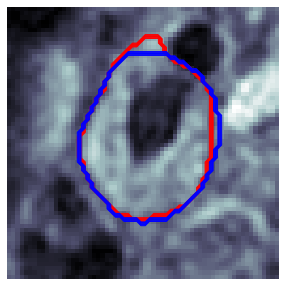

In [33]:
sl = 7

coords_gt = np.where(gt[sl, ...]>0)

x_c_gt = np.mean(coords_gt[0])
y_c_gt = np.mean(coords_gt[1])

x_min = int(x_c_gt-32)
x_max = int(x_c_gt+32)

y_min = int(y_c_gt-32)
y_max = int(y_c_gt+32)

plt.figure(figsize=(5, 5))
plt.imshow(img[sl, x_min:x_max, y_min:y_max], cmap='bone')
c1 = plt.contour((nnunet>0)[sl, x_min:x_max, y_min:y_max], colors=['r'], linewidths=1)
c2 = plt.contour(plaqunet[sl, x_min:x_max, y_min:y_max]>0, colors=['b'], linewidths=1)
c1.collections[0].set_label('nnUNet')
c2.collections[0].set_label('plaq-u-net')
#plt.legend()
plt.axis('off')
plt.show()

In [34]:
sub_names_test = ['AMC012', 'AMC006', 
                  'MUMC094', 'MUMC027', 'MUMC079', 'MUMC052', 'MUMC127', 'MUMC071', 'MUMC038', 'MUMC093', 'MUMC107', 
                  'MUMC022', 'MUMC114', 'MUMC115', 'MUMC069', 'MUMC130', 'MUMC036', 'MUMC007', 'MUMC059', 'MUMC080', 
                  'UMCU036', 'UMCU025', 'UMCU008', 'UMCU034']

In [35]:
dirname_imgdata = 'D:/Lisa/nnUNet_raw_data_base/nnUNet_raw_data/Task001_CA/imagesTr/'
dirname_imgdata_test = 'D:/Lisa/nnUNet_raw_data_base/nnUNet_raw_data/Task001_CA/imagesTs1/'
dirname_gtdata = 'D:/Lisa/nnUNet_raw_data_base/nnUNet_raw_data/Task001_CA/labelsTr/'
dirname_gtdata_test = 'D:/Lisa/nnUNet_raw_data_base/nnUNet_raw_data/Task001_CA/labelsTs1/'
dirname_nnunetdata = 'D:/Lisa/nnUNet_raw_data_base/nnUNet_results/Tr/'
dirname_nnunetdata_test = 'D:/Lisa/nnUNet_raw_data_base/nnUNet_results/Ts1/'

In [37]:
import pickle

In [39]:
def norm_img(img_arr):

    img_min = np.min(img_arr) 
    img_max = np.max(img_arr) 
    
    img_norm = np.copy((img_arr - img_min)/(img_max - img_min)*255).astype(np.uint8)
        
    return img_norm

In [46]:
filename_img = r"D:\Lisa\nnUNet_raw_data_base\nnUNet_raw_data\Task001_CA\imagesTs1\AMC006_0000.nii.gz"
filename_sm = r"D:\Lisa\nnUNet_raw_data_base\nnUNet_results\Ts1\AMC006.npz"
filename_pkl = r"D:\Lisa\nnUNet_raw_data_base\nnUNet_results\Ts1\AMC006.pkl"
filename_gt = r"D:\Lisa\nnUNet_raw_data_base\nnUNet_raw_data\Task001_CA\labelsTs1\AMC006.nii.gz"

img = nib.load(filename_img).get_fdata().T
gt = nib.load(filename_gt).get_fdata().T
sm_cropped = np.load(filename_sm)['softmax']
with open(filename_pkl, 'rb') as f:
    p = pickle.load(f)
crop_box = p['crop_bbox']
sm = np.zeros(img.shape, dtype=np.float16)
sm[crop_box[0][0]:crop_box[0][1], crop_box[1][0]:crop_box[1][1], crop_box[2][0]:crop_box[2][1]] = sm_cropped[1, ...]

i = 0

X = np.zeros((img.shape[0], img.shape[1], img.shape[2], 2), dtype = np.uint8)
y = np.zeros((img.shape[0], img.shape[1], img.shape[2], 1), dtype = np.uint8)

for j in range (0, img.shape[0]):
    img_norm = norm_img(img[j, ...])
    X[i, ..., 0] = np.rot90(img_norm, k=2)
    X[i, ..., 1] = np.rot90(255*sm[j, ...], k=2)
    y[i, ..., 0] = np.rot90(gt[j, ...], k=2)
    i += 1

In [77]:
filename_plaqunet = r"C:\Users\E.Lavrova\Documents\GitHub\plaqueuqalp\res\nifti_compare\test_plaqumap\AMC006.nii.gz"
mask_plaqunet = np.rot90(nib.load(filename_plaqunet).get_fdata())

In [102]:
sl = 7

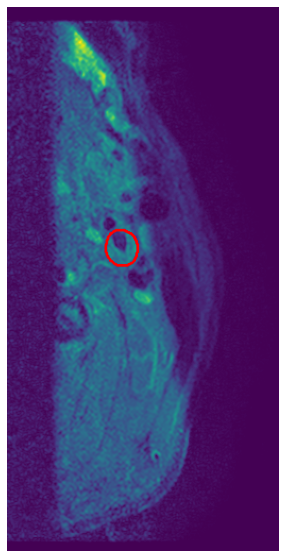

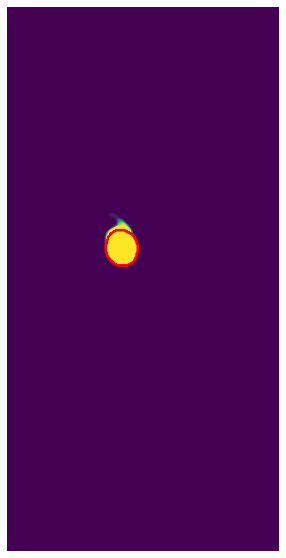

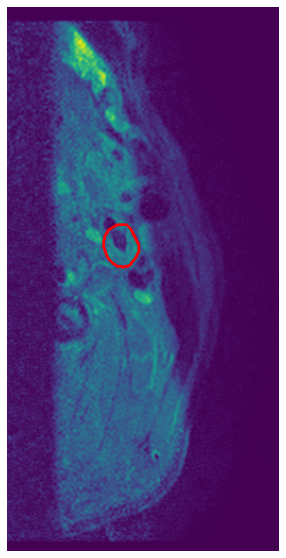

In [103]:
plt.figure(figsize=(10, 10))
plt.imshow(X[sl, ..., 0])
plt.contour(y[sl, ..., 0], colors='r')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(X[sl, ..., 1], vmin=0, vmax=255)
plt.contour(y[sl, ..., 0], colors='r')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(X[sl, ..., 0])
plt.contour(np.rot90(mask_plaqunet[..., sl].T, k=-1), colors='r')
plt.axis('off')
plt.show()

In [111]:
A = np.zeros((y[sl, ..., 0].shape[0], y[sl, ..., 0].shape[1], 3))
A[..., 0] = np.rot90(mask_plaqunet[..., sl].T, k=-1)
A[..., 1] = y[sl, ..., 0]
A[..., 2] = X[sl, ..., 1]/255

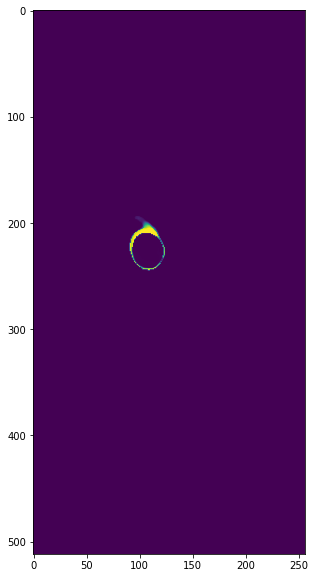

In [116]:
plt.figure(figsize=(10, 10))
plt.imshow(np.std(A, axis=2))

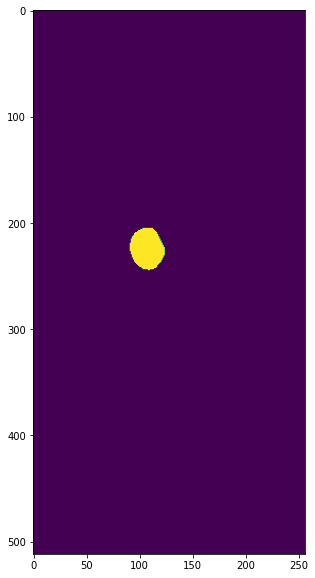

In [105]:
plt.figure(figsize=(10, 10))
plt.imshow(np.rot90(mask_plaqunet[..., sl].T, k=-1))

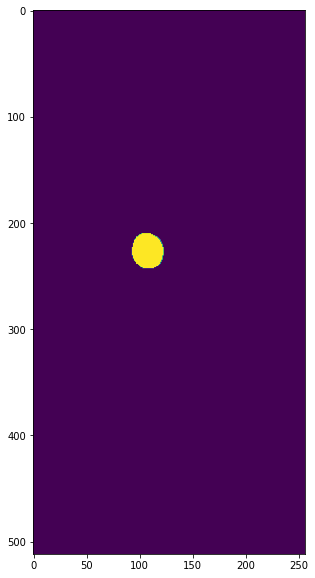

In [106]:
plt.figure(figsize=(10, 10))
plt.imshow(y[sl, ..., 0])